# 🏡 House Price Prediction - Day 1: Exploratory Data Analysis (EDA)

## 📌 Objective:
Perform exploratory data analysis to understand the impact of features like square footage and location on house prices.

- Understand data structure
- Identify missing values
- Visualize relationships between features and price
- Focus: Square footage, Location


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


## 📂 Load Dataset

We'll use Kaggle's **House Prices: Advanced Regression Techniques** dataset.
Make sure the CSV is placed in the `data/` folder.


In [3]:
df = pd.read_csv("../data/train.csv")  # Ensure path is correct
df.shape


(1460, 81)

## 👀 Initial Glimpse of the Data
Let's take a quick look at the structure of the dataset.


In [4]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 🔍 Missing Value Analysis
We’ll identify columns with missing data and their percentages.


In [6]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_df


,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


## 🧮 Focus: Square Footage & Location

We'll now explore how **GrLivArea (above ground living area)** and **Neighborhood (location)** affect `SalePrice`.


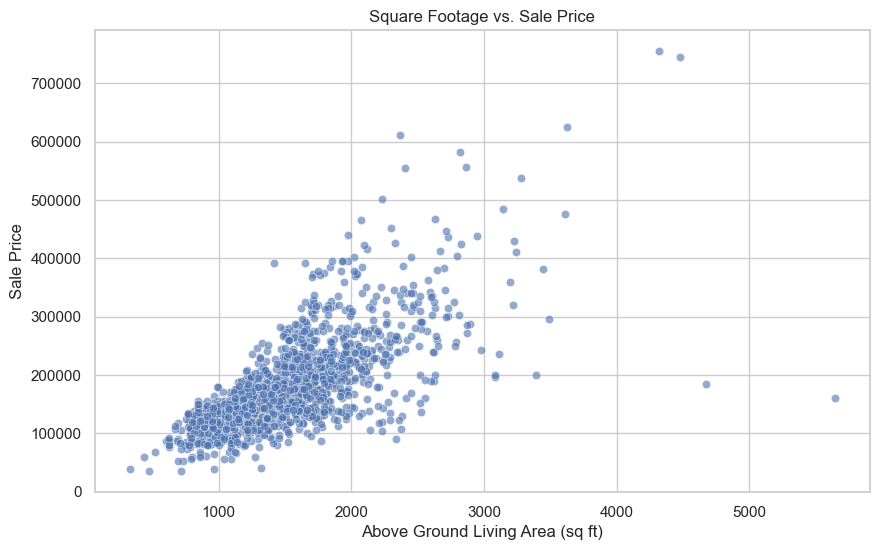

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6)
plt.title("Square Footage vs. Sale Price")
plt.xlabel("Above Ground Living Area (sq ft)")
plt.ylabel("Sale Price")
plt.show()


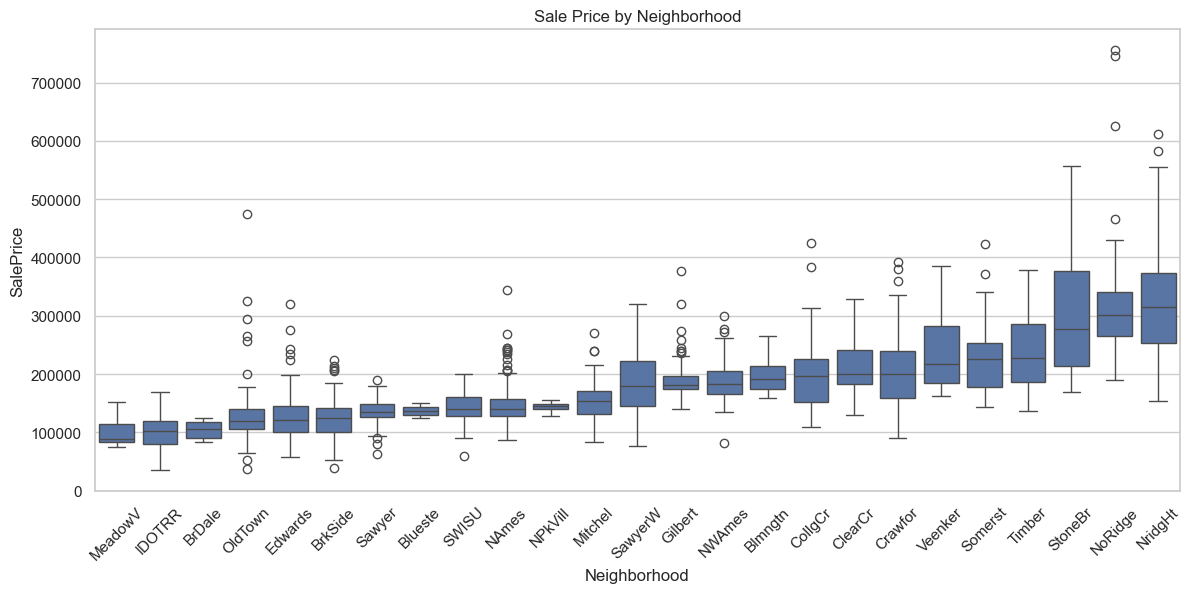

In [8]:
plt.figure(figsize=(14, 6))
order = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index
sns.boxplot(data=df, x='Neighborhood', y='SalePrice', order=order)
plt.xticks(rotation=45)
plt.title("Sale Price by Neighborhood")
plt.show()


## 📊 Correlation Heatmap (Top 10)
We'll find features most correlated with SalePrice.


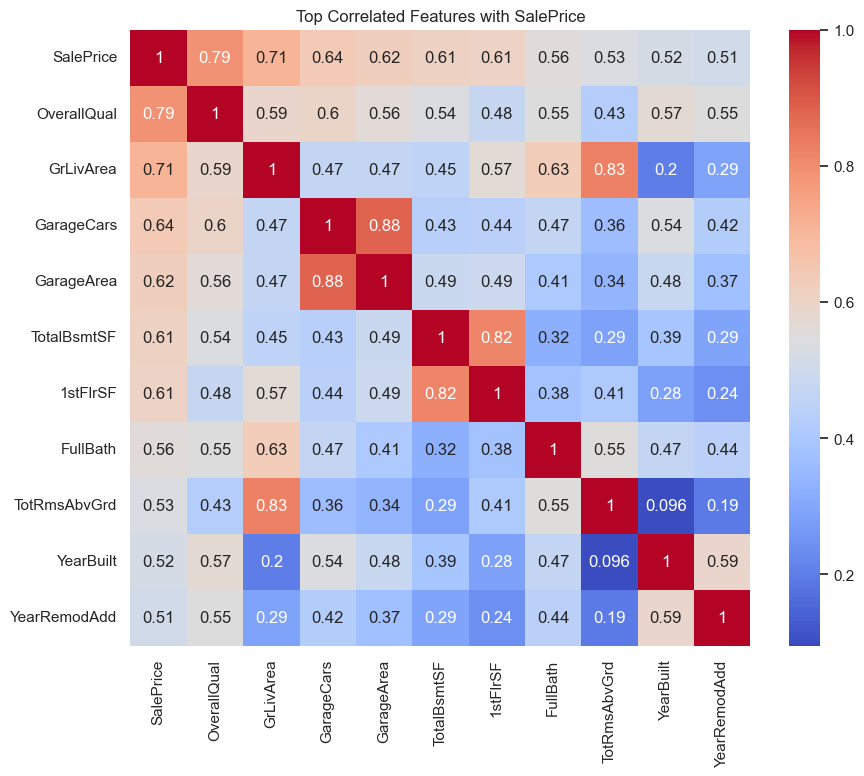

In [10]:
plt.figure(figsize=(10, 8))

numeric_df = df.select_dtypes(include=[np.number])  
top_corr = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False).head(11).index

sns.heatmap(numeric_df[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()


## 📝 Observations

- **GrLivArea** shows strong positive correlation with `SalePrice`.
- Some neighborhoods are more expensive on average.
- Missing values exist in features like `PoolQC`, `MiscFeature`, and `Alley`—these need preprocessing.


In [12]:
# Saving cleaned subset for day2

eda_df = df[['SalePrice', 'GrLivArea', 'Neighborhood']]
eda_df.to_csv("../data/eda_day1_subset.csv", index=False)
